In [1]:
import warnings

warnings.filterwarnings("ignore")

import json
import math
import os
import re
import sys
from collections import Counter
from copy import deepcopy
from functools import reduce
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from rich import print
from tqdm import tqdm

In [2]:
def plot_mtx(mtx):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.matshow(mtx, cmap=plt.cm.Blues)
    for i in range(mtx.shape[0]):
        for j in range(mtx.shape[1]):
            c = mtx[i, j]
    plt.plot()

In [3]:
def read_file_to_str_li(fp, print_exp=True):
    with open(fp, "r") as f:
        lines = f.read().split("\n")
    if print_exp:
        print(f"Read from {fp}:")
        print(f"First line: {lines[0]} | Last line: {lines[-1]}")
        print("-" * 6)

    return lines


# define the function blocks
def convert_to_int(input_str):
    if input_str == "" or input_str == " ":
        return None
    return int(input_str)


def convert_to_str(input_str):
    return str(input_str)


# map the inputs to the function blocks
converts = {
    "i": convert_to_int,
    "s": convert_to_str,
}


def convert_str_li_to_other_li(
    str_li, pattern="i", per_letter=False, sep=" ", start_row=0, end_row=None
):
    """Convert a list of string to a list of other types

    pattern: a list of types for one item.
        'i' for int, 's' for string
        'si' means: convert the 1st item to string, the rest to integer
        If separated items are more than pattern items,
        use the last one from the parttern.
    if per_letter=True, ignore sep and separate item per letter
    """
    target_str_li = str_li[start_row:end_row]
    # find max item num
    max_item_num = 1
    if per_letter:
        max_item_num = max([len(s) for s in target_str_li])
    else:
        max_item_num = max([len(s.split(sep)) for s in target_str_li])

    # extend the pattern to the max itme num
    pattern = (
        pattern + f"{pattern[-1]}" * (max_item_num - len(pattern))
        if max_item_num > len(pattern)
        else pattern
    )

    # convert
    if per_letter:
        return [
            [converts[pattern[idx]](item) for idx, item in enumerate(s)]
            for s in target_str_li
        ]
    else:
        if sep == " ":
            return [
                [converts[pattern[idx]](item) for idx, item in enumerate(s.split())]
                for s in target_str_li
            ]
        else:
            return [
                [converts[pattern[idx]](item) for idx, item in enumerate(s.split(sep))]
                for s in target_str_li
            ]

In [4]:
fp = "input.txt"
lines = read_file_to_str_li(fp)

print("Convert to:")

# head = convert_str_li_to_other_li(
#     lines, pattern="s", per_letter=True, sep=",", start_row=0, end_row=1
# )

# print(f"Head:\n{head}")
# print(f"First line: {head[0]}")
# print(f"Last line: {head[-1]}")

data = convert_str_li_to_other_li(
    lines, pattern="s", per_letter=False, sep="->", start_row=None, end_row=None
)


print(f"First line: {data[0]}")
print(f"Last line: {data[-1]}")
print("-" * 6)

Read from input.txt:

First line: 498,13 -> 498,16 -> 496,16 -> 496,20 -> 509,20 -> 509,16 -> 502,16 -> 502,13 | 
Last line: 478,162 -> 478,154 -> 478,162 -> 480,162 -> 480,159 -> 480,162 -> 482,162 -> 
482,156 -> 482,162 -> 484,162 -> 484,161 -> 484,162 -> 486,162 -> 486,155 -> 486,162 -> 
488,162 -> 488,159 -> 488,162 -> 490,162 -> 490,158 -> 490,162 -> 492,162 -> 492,159 -> 
492,162 -> 494,162 -> 494,158 -> 494,162 -> 496,162 -> 496,153 -> 496,162

------

Convert to:

First line: ['498,13 ', ' 498,16 ', ' 496,16 ', ' 496,20 ', ' 509,20 ', ' 509,16 ', ' 502,16 
', ' 502,13']

Last line: ['478,162 ', ' 478,154 ', ' 478,162 ', ' 480,162 ', ' 480,159 ', ' 480,162 ', ' 
482,162 ', ' 482,156 ', ' 482,162 ', ' 484,162 ', ' 484,161 ', ' 484,162 ', ' 486,162 ', ' 
486,155 ', ' 486,162 ', ' 488,162 ', ' 488,159 ', ' 488,162 ', ' 490,162 ', ' 490,158 ', ' 
490,162 ', ' 492,162 ', ' 492,159 ', ' 492,162 ', ' 494,162 ', ' 494,158 ', ' 494,162 ', ' 
496,162 ', ' 496,153 ', ' 496,162']

------

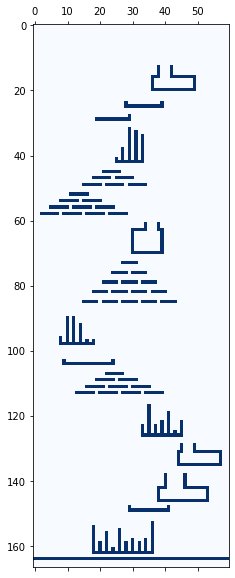

In [5]:
sands = np.zeros((999, 999))

bottom = 0

for line in data:
    for idx in range(len(line) - 1):
        p1 = [int(i) for i in line[idx].strip().split(",")]
        p2 = [int(i) for i in line[idx + 1].strip().split(",")]
        for j in range(min(p1[0], p2[0]), max(p1[0], p2[0]) + 1):
            for i in range(min(p1[1], p2[1]), max(p1[1], p2[1]) + 1):
                sands[i, j] = 1
        if max(p1[1], p2[1]) > bottom:
            bottom = max(p1[1], p2[1])

sands[bottom + 2, 0:999] = 1  # For Q2

plot_mtx(sands[0 : bottom + 5, 460:520])

In [6]:
def next_move(current_p):
    x, y = current_p[0], current_p[1]
    if sands[x + 1, y] == 0:
        return 1, [x + 1, y]
    elif sands[x + 1, y - 1] == 0:
        return 1, [x + 1, y - 1]
    elif sands[x + 1, y + 1] == 0:
        return 1, [x + 1, y + 1]
    else:
        return 0, [x, y]  # REST

Answer to Q1: 1061

Answer to Q2: 25055

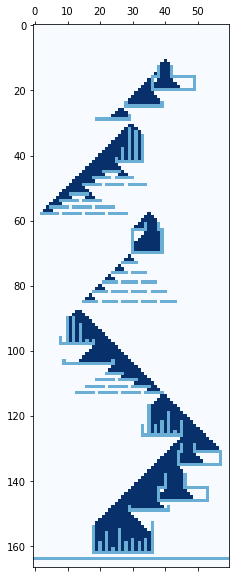

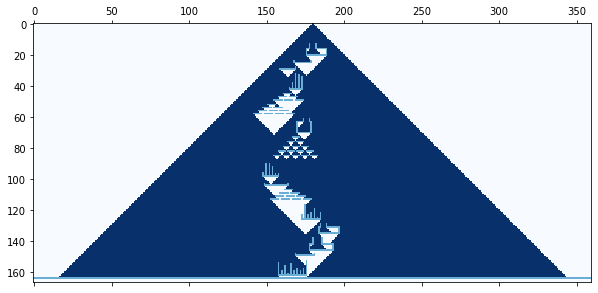

In [7]:
count = 0
start_p = [0, 500]
end_q1 = False
while True:
    p = start_p
    while True:
        flag, p = next_move(p)
        if (not end_q1) and (p[0] >= bottom):
            flag = -1
            print(f"Answer to Q1: {count}")
            plot_mtx(sands[0 : bottom + 5, 460:520])
            end_q1 = True
        if p == start_p:
            flag = -2
            count += 1
            print(f"Answer to Q2: {count}")
        if flag == 1:
            continue
        else:
            if flag == 0:
                sands[p[0], p[1]] = 2
                count += 1
            break

    if flag == -2:
        break

sands[start_p[0], start_p[1]] = 2

plot_mtx(sands[0 : bottom + 5, 320:680])